In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
a = np.array(list(range(1,11)))

In [3]:
a


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
a.mean()

5.5

In [6]:
a.std()

2.8722813232690143

In [7]:
a.var()

8.25

### scalar optimization 

In [2]:
def scalar1(x):
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)

In [3]:
x = np.linspace(-10, 10, 200)
y = scalar1(x)

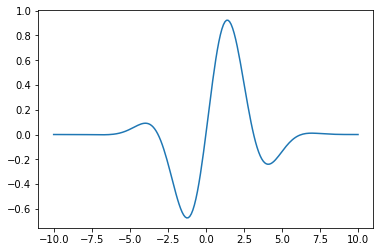

In [4]:
plt.plot(x,y)

In [5]:
from scipy import optimize
result = optimize.minimize_scalar(scalar1)

In [6]:
print(result)

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282


In [8]:
scalar1(result['x'])

-0.6743051024666711

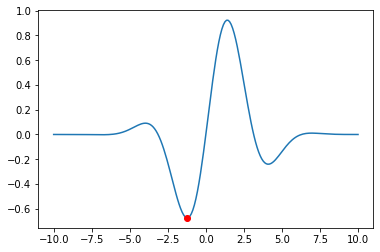

In [10]:
plt.plot(x,y)
plt.plot(result['x'], result['fun'], 'ro')


In [14]:
result2 = optimize.minimize_scalar(scalar1, bounds=(0,10), method='Bounded')

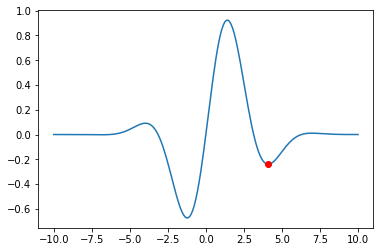

In [15]:
plt.plot(x,y)
plt.plot(result2['x'], result2['fun'], 'ro')

In [24]:
# minimize sin(x) * exp(-0.1 (x-0.6)**2) s.t.
#  0.5 < log(x**2 + 2) < 1.5
# sin(x) + 0.3 x*2 = 1

# Left-sided inequality from the first constraint
def constraint1(x):
    return 0.5-np.log10(x**2+2)
# Right-sided inequality from the first constraint
def constraint2(x):
    return np.log10(x**2+2) - 1.5
# Equality from the second constraint
def constraint3(x):
    return np.sin(x)+0.3*x**2-1

# Construct dictionaries
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
con3 = {'type':'eq','fun':constraint3}

# Put those dictionaries into a tuple
cons = (con1,con2,con3)

In [17]:
result3 = optimize.minimize(scalar1,x0=0,method='SLSQP',
constraints=cons,options={'maxiter':1000})

In [18]:
result3

     fun: 0.7631695862891654
     jac: array([0.59193639])
 message: 'Iteration limit exceeded'
    nfev: 12954
     nit: 1001
    njev: 1001
  status: 9
 success: False
       x: array([0.8773752])

In [25]:
result5 = optimize.minimize(scalar1,x0=-2,method='SLSQP',constraints=cons,options={'maxiter':100})
#result5 = optimize.minimize(scalar1,x0=-2,method='SLSQP',constraints=cons,options={'maxiter':1000})

In [26]:
print(result5)

     fun: -0.2859494456768613
     jac: array([-0.4675066])
 message: 'Positive directional derivative for linesearch'
    nfev: 811
     nit: 71
    njev: 67
  status: 8
 success: False
       x: array([-2.37569791])
